In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
tax_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')

In [18]:
tax_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


C:\Users\91829\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PoliticalParty', ylabel='count'>

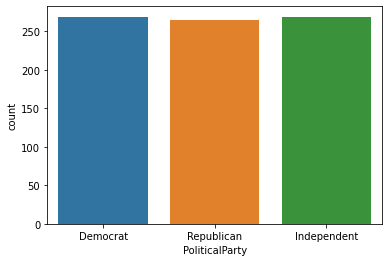

In [19]:
Z =test_data.iloc[:,1:]
Z = Z.drop(['Married'],axis = 1)
X=tax_data.iloc[:,1:-1]
X = X.drop(['Married'],axis = 1)
y=tax_data.iloc[:,-1]
tax_data
sns.countplot('PoliticalParty',data = tax_data)

In [20]:
X.isnull().sum()

HHI              0
HHDL             0
CollegGrads      0
AHHAge           0
Cars             0
Filed in 2017    0
Filed in 2016    0
Filed in 2015    0
dtype: int64

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
# from sklearn import preprocessing
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_scaled = scaler.transform(X_train)
# X_scaled

In [88]:
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X_scaled,y_train)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth =6,n_estimators =3000,max_features = 'log2',criterion ='gini')
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features='log2', n_estimators=3000)

In [89]:
# log_predictor = clf.predict(X_test)
rfc_predictor = rfc.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,rfc_predictor)*100)

34.024896265560166


In [91]:
# from sklearn.model_selection import RandomizedSearchCV
# penalty =['l1 ','l2','elasticnet','none']
# C = np.logspace(-4,4,20)
# solver= ['lbfgs','newton-cg','liblinear','sag','saga']
# max_iter =[100,1000,3000,6000]
# # min_samples_leaf = [1,3,4,6,9]
# random_grid ={'penalty':penalty ,'C':C,'solver':solver ,'max_iter':max_iter} 
# print(random_grid)

In [92]:
# log_randomcv =RandomizedSearchCV(estimator=clf ,
#                                  param_distributions=random_grid,
#                                  n_iter=70,
#                                  n_jobs=-1,
#                                  cv=5,
#                                  verbose=2,
#                                  random_state=50)
# log_randomcv.fit(X_train, y_train)

In [93]:
# log_randomcv.best_params_

In [94]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix
# best_random_grid = log_randomcv.best_estimator_
# y_pred = best_random_grid.predict(X_test)
# print(accuracy_score(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))


In [95]:
#Z = scaler.transform(Z)
predictions = rfc.predict(Z)

In [96]:
res = pd.DataFrame(predictions) 
res.index = Z.index 
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False)